# Latent Dirichlet Allocation

The purpose of applying the LDA method is to obtain the distribution of words that make up a topic and documents with a particular topic. The first stage in LDA modeling is to initialize the parameters. These parameters can be the number of documents, the number of words in the document, the number of topics, the number of iterations, and the LDA coefficient. The next stage is to mark a word with a predetermined topic by applying a semi-random distribution based on the Dirichlet distribution method. Next is the iteration stage. In this stage, there are parameters that can determine the distribution of the number of topics and the distribution of words from topics in a document.

In [2]:
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from string import punctuation
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


### Initial Formalization

In [3]:
formalization_indo = {
    "@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "ahaha": "haha", "aj": "saja", "ajep-ajep": "disko", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa", "apasih": "apa", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "palsu", "ato": "atau", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bangedh": "banget", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "beli", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "benar", "bodor": "lucu", "bokap": "ayah", "bokis": "bohong", "boljug": "boleh", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong", "bubbu": "tidur", "bubu": "tidur", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "ce": "cewek", "cekal": "cegah", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmpur": "campur", "cong": "banci", "cowwyy": "maaf", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cups": "culun", "curanmor": "pencurian", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "hancur", "dimaafin": "maaf", "dimintak": "minta", "disono": "sana", "dket": "dekat", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dtg": "datang", "duren": "durian", "ed": "edisi", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fyi": "informasi", "gag": "tidak", "gan": "juragan", "gawe": "kerja", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "githu": "gitu", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "gretongan": "gratis", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hr": "hari", "hrus": "harus", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "benci", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamuwh": "kamu", "karna": "karena", "katrok": "kampungan", "kayanya": "seperti", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kekeuh": "bersikeras", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "ketrima": "terima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lemot", "louph": "cinta", "low": "kalau", "lp": "lupa", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "maho": "homo", "maksain": "maksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat", "mgu": "minggu", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mulu": "melulu", "mumpung": "selagi", "musti": "mesti", "muupz": "maaf", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "ngaku": "mengaku", "ngambil": "mengambil", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "beri", "ngebandel": "bandel", "ngegosip": "gosip", "ngeklaim": "klaim", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "rampok", "ngga": "tidak", "ngibul": "bohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "cari", "ngurus": "urus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "ntar": "nanti", "ntn": "nonton", "numpuk": "tumpuk", "nutupin": "tutup", "nyari": "cari", "nyekar": "menyekar", "nyicil": "cicil", "nyoblos": "coblos", "nyokap": "ibu", "ol": "online", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pd": "pada", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pisan": "sangat", "pk": "pakai", "plg": "paling", "pmrnth": "pemerintah", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "re": "balas", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruz": "terus", "saia": "saya", "sampe": "sampai", "sapose": "siapa", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sempet": "sempat", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "siramin": "siram", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri",  "songong": "sombong", "sory": "maaf", "sotoy": "tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "telat": "terlambat", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thn": "tahun", "tilang": "bukti pelanggaran", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "w/": "dengan", "wat": "buat", "wkt": "waktu", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yg": "yang", "yo": "iya", "yup": "iya", "7an": "tujuan", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "akko": "aku", "akku": "aku", "akyu": "aku", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "segera", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bales": "balas", "bangkotan": "tua", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "bet": "banget", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bpk": "bapak", "brngkt": "berangkat", "brp": "berapa", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cape": "capek", "caur": "jelek", "cemplungin": "masuk", "ceper": "pendek", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gretong": "gratis", "gt": "begitu", "gue": "saya", "haghaghag": "tertawa", "hakhak": "tertawa", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "huft": "mengeluh", "humas": "hubungan masyarakat", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jwb": "jawab", "ka": "kakak", "kacian": "kasihan", "kaga": "tidak", "kaka": "kakak", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kek": "seperti", "keknya": "seperti", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "penasaran", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "bersikeras", "khan": "kan", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lbur": "libur", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maen": "main", "mak": "ibu", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "mksd": "maksud", "mls": "malas", "mnt": "minta",  "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "muahal": "mahal", "mumet": "pusing", "muna": "munafik", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "naq": "anak", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngantri": "antri", "ngaruh": "pengaruh", "ngawur": "sembarangan", "ngeceng": "kumpul", "ngeh": "sadar", "ngekos": "kos", "ngelamar": "lamar", "ngeliat": "lihat", "ngemeng": "bicara", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "bicara", "ngumpul": "kumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "cari", "nyiapin": "siap", "nyiram": "siram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "sni": "sini", "sorry": "maaf", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "tengok": "jenguk", "terbitin": "terbit", "tgl": "tanggal", "thd": "terhadap", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "tp": "tapi", "trgntg": "tergantung", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "apk": "aplikasi", "dg" : "dengan", "blanja": "belanja", "sukaa": "suka", "cpt": "cepat", "bwrtransaksi": "transaksi", "realpict": "asli", "moga": "semoga", "muas": "puas", "ori": "asli", "ongkirnya": "ongkir", "turunin": "turun", "orii": "asli", "original": "asli", "hargax": "harga", "mehong": "mahal", "kainx": "kain", "rb": "ribu", "shopping": "belanja", "made": "buat", "easier": "mudah", "ways": "cara", "pay": "bayar", "applikasi": "aplikasi", "kwalitas": "kualitas", "good": "bagus", "ngechat": "chat", "ngobrol": "bicara", "ngertiin": "mengerti", "protol": "lepas", "balikin": "balik", "trx": "transaksi", "nyebelin": "sebal", "trf": "transfer", "ngebantuin": "bantu", "org": "orang", "peribet": "ribet", "fedback": "feedback", "koment": "komentar", "takuuut": "takut", "ketipuuuuh": "tipu", "register": "daftar", "hp": "handphone", "org": "orang", "instal": "install", "skarng": "sekarang", "true": "benar", "story": "cerita", "payment": "bayar", "confirm": "konfirmasi", "batalin": "batal", "ig": "instagram", "pelyanan": "layanan", "after": "setelah", "nunggu": "tunggu", "blom": "belum", "reffund": "refund", "jeleeeekkk": "jelek", "make": "pakai", "nyoba": "coba", "pantesan": "pantas", "slow": "lambat", "skrg": "sekarang", "dibalikin": "balik", "transver": "transfer", "pantes": "pantas", "staffnya": "staff", "divalidasi": "validasi", "smpe": "sampai", "pelayananya": "layanan", "komennya": "komentar", "komplin": "komplain", "complaint": "komplain", "hpus": "hapus", "muaaahal": "mahal", "masukkk": "masuk", "tlg": "tolong", "wa": "whatsapp", "luama": "lama", "stokmya": "stok", "ready": "siap", "setrlah": "setelah", "sprt": "seperti", "cs": "customer service", "direspon": "respon","prcuma": "percuma", "bkin": "bikin", "app": "aplikasi", "hape": "handphone", "karti": "kartu",  "apps": "aplikasi", "responnya": "respon", "mahalllll": "mahal", "balesan": "balas", "paswordnya": "password", "masul": "masuk", "ksong": "kosong", "nyarinya": "cari", "kluarnya": "keluar", "system": "sistem", "systemnya": "sistem", "chatt": "chat", "kridit": "kredit", "pelayananya": "layanan", "kwalitasnya": "kualitas","mantap": "bagus", "produck": "produk", "baharu": "baru", "slalu": "selalu", "dwnld": "unduh", "download": "unduh", "sndri":  "sendiri", "batalin": "batal", "mbingungin": "bingung", "vocer": "voucher", "boong”": "bohong", "apus": "hapus", "sori": "maaf", "tf": "transfer", "apknya": "aplikasi", "diem": "diam", "dtang": "datang", "bukak": "buka", "boong": "bohong", "setiyap": "setiap", "sukak": "suka", "ngincer": "incar", "store": "toko", "fiturnya": "fitur", "apkx": "aplikasi", "voucherx": "voucher", "hub": "hubungi", "payaaaaaaaahh": "payah", "apl": "aplikasi", "mamam": "makan", "luama": "lama"
}

In [4]:
formalization_indo

{'7an': 'tujuan',
 '@': 'di',
 'abis': 'habis',
 'ad': 'ada',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'adoh': 'aduh',
 'after': 'setelah',
 'aha': 'tertawa',
 'ahaha': 'haha',
 'ahokncc': 'ahok',
 'aing': 'saya',
 'aj': 'saja',
 'aja': 'saja',
 'ajep-ajep': 'disko',
 'ajj': 'saja',
 'ak': 'saya',
 'akhirx': 'akhirnya',
 'akika': 'aku',
 'akko': 'aku',
 'akkoh': 'aku',
 'akku': 'aku',
 'akuwh': 'aku',
 'akyu': 'aku',
 'alay': 'norak',
 'alow': 'halo',
 'ama': 'sama',
 'ambilin': 'ambilkan',
 'ambl': 'ambil',
 'analisise': 'analisis',
 'ancur': 'hancur',
 'anjir': 'anjing',
 'anjrit': 'anjing',
 'ank': 'anak',
 'anter': 'antar',
 'ap': 'apa',
 'ap2': 'apa',
 'apaan': 'apa',
 'apasih': 'apa',
 'ape': 'apa',
 'apes': 'sial',
 'apk': 'aplikasi',
 'apknya': 'aplikasi',
 'apkx': 'aplikasi',
 'apl': 'aplikasi',
 'aplot': 'unggah',
 'app': 'aplikasi',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'aps': 'apa',
 'apus': 'hapus',
 'apva': 'apa',
 'aq': 'saya',
 'aqu': 'aku',
 'aquwh': 'aku',
 '

In [5]:
random_state = 0

### Initial Token

In [6]:
# list for tokenized documents in loop
texts = []

In [7]:
tokenizer = RegexpTokenizer(r'\w+')

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
df_token = pd.read_csv("https://gist.githubusercontent.com/Kaniku/224fce0e62377d27af500cf2ce896360/raw/e3343510a66b1a9c7d555dde4e03da9f243e2ab0/data_sample_1000.csv")

### Tokenization

In [11]:
# Tokenize
for i in df_token['review_processed']:
  tokens = tokenizer.tokenize(i)
  texts.append(tokens)

### Formalization

In [12]:
def convert(l, d):
  return [convert(x, d) if isinstance(x, list) else d.get(x, x) for x in l]

In [13]:
texts = convert(texts, formalization_indo)

In [14]:
texts

[['beli', 'pakai', 'cc', 'ribet', 'tolak', 'sedia', 'layan'],
 ['verifikasi', 'email', 'kesel'],
 ['up', 'money', 'bilang', 'manajemen'],
 ['iklan', 'sebal'],
 ['nonton', 'ngapa', 'kesini', 'melulu'],
 ['belanja',
  'tipu',
  'jual',
  'nakal',
  'selektif',
  'nyaring',
  'jual',
  'beda',
  'online',
  'shop'],
 ['tolong',
  'bantu',
  'kenapa',
  'sertifikat',
  'smpai',
  'skrang',
  'dashboard',
  'pdhal',
  'pihal',
  'bus',
  'email',
  'sertifikat',
  'tanggal',
  'september',
  'smpaj',
  'tanggal',
  'dashboard',
  'pdhal',
  'jam'],
 ['kirim',
  'tanggap',
  'tenggang',
  'kirim',
  'barang',
  'seller',
  'langgan',
  'idiot'],
 ['aplikasi', 'kaya', 'ribet'],
 ['pusat',
  'bantu',
  'fitur',
  'live',
  'cht',
  'beli',
  'barang',
  'lngsung',
  'nnaya',
  'bles',
  'hadehhhh',
  'macetttt',
  'trimksih',
  'beli'],
 ['pret', 'barang', 'return', 'shope', 'balik'],
 ['barang',
  'kirim',
  'pdhal',
  'order',
  'komplain',
  'katanya',
  'refund',
  'smp',
  'sekarang',
  '

## Modelling

In [15]:
ldamodel = gensim.models.ldamodel.LdaModel.load('gdrive/MyDrive/save_file/lda_stem_5')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [16]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = ldamodel.id2word

In [17]:
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [18]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
  # Init output
  sent_topics_df = pd.DataFrame()

  # Get main topic in each document
  for i, row_list in enumerate(ldamodel[corpus]):
    row = row_list[0] if ldamodel.per_word_topics else row_list
    print(row)
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
      if j == 0:
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
      else:
        break
  sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

  # Add original text to the end of the output
  contents = pd.Series(texts)
  sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
  return(sent_topics_df)

In [19]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

[(0, 0.025434883), (1, 0.2835185), (2, 0.3198812), (3, 0.02513272), (4, 0.34603268)]
[(0, 0.5500002), (1, 0.05000001), (2, 0.050000016), (3, 0.05000001), (4, 0.29999983)]
[(0, 0.64005744), (1, 0.040000193), (2, 0.040000387), (3, 0.040000208), (4, 0.23994175)]
[(0, 0.40095598), (1, 0.066666685), (2, 0.066666715), (3, 0.06666669), (4, 0.39904392)]
[(0, 0.6015741), (1, 0.040000014), (2, 0.040000025), (3, 0.27842584), (4, 0.04000001)]
[(0, 0.19993494), (1, 0.018602803), (2, 0.018181905), (3, 0.29064038), (4, 0.47263995)]
[(0, 0.42012614), (1, 0.010528934), (2, 0.32634315), (3, 0.066248186), (4, 0.17675355)]
[(0, 0.2550655), (1, 0.022222394), (2, 0.022222677), (3, 0.02238241), (4, 0.678107)]
[(0, 0.29979935), (1, 0.30021453), (2, 0.050000075), (3, 0.29998603), (4, 0.050000004)]
[(0, 0.43495274), (1, 0.014342564), (2, 0.10726952), (3, 0.2034658), (4, 0.2399694)]
[(0, 0.3666083), (1, 0.03333347), (2, 0.03333363), (3, 0.03333349), (4, 0.5333911)]
[(0, 0.59057045), (1, 0.016754158), (2, 0.01666

In [20]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.3460,"barang, kirim, cepat, pesan, sesuai, harga, be...","[beli, pakai, cc, ribet, tolak, sedia, layan]"
1,1,0.0,0.5500,"toko, bayar, tolong, akun, pakai, tipu, shoppe...","[verifikasi, email, kesel]"
2,2,0.0,0.6401,"toko, bayar, tolong, akun, pakai, tipu, shoppe...","[up, money, bilang, manajemen]"
3,3,0.0,0.4010,"toko, bayar, tolong, akun, pakai, tipu, shoppe...","[iklan, sebal]"
4,4,0.0,0.6016,"toko, bayar, tolong, akun, pakai, tipu, shoppe...","[nonton, ngapa, kesini, melulu]"
...,...,...,...,...,...
995,995,4.0,0.7320,"barang, kirim, cepat, pesan, sesuai, harga, be...","[barang, lengkap]"
996,996,1.0,0.4542,"belanja, ongkir, gratis, mudah, murah, bayar, ...","[belanja, aman, topup, biaya, admin, harga, mu..."
997,997,2.0,0.5482,"bantu, sukses, butuh, mudah, beli, selalu, maj...","[tingkat, promo, ehehe]"
998,998,4.0,0.5308,"barang, kirim, cepat, pesan, sesuai, harga, be...","[bags, barang, ny]"


In [21]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
  corpus_sel = corpus[start:end]
  dominant_topics = []
  topic_percentages = []
  for i, corp in enumerate(corpus_sel):
    topic_percs = model[corp]
    dominant_topic = sorted(topic_percs, key = lambda x:x[1], reverse=True)[0][0]
    dominant_topics.append((i, dominant_topic))
    topic_percentages.append(topic_percs)
  return(dominant_topics, topic_percentages)

In [22]:
dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)

In [23]:
# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc)
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

Dominant_Topic
0.0    394
1.0    154
2.0     65
3.0    132
4.0    255
dtype: int64


In [24]:
# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

In [25]:
# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False)for j, (topic, wt) in enumerate(topics) if j < 3]
df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(',\n'.join)
df_top3words.reset_index(level=0,inplace=True)

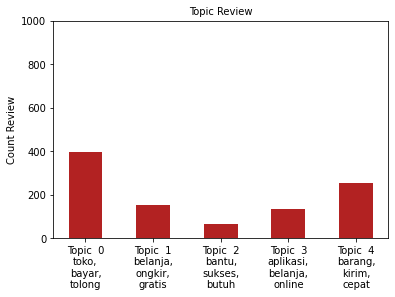

In [26]:
fig, ax1 = plt.subplots()

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', 
        data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x,pos: 'Topic  ' + str(x)+'\n'+ df_top3words.loc[df_top3words.topic_id==x,'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Topic Review', fontdict=dict(size=10))
ax1.set_ylabel('Count Review')
ax1.set_ylim(0,1000)

plt.show()

In [27]:
result = pd.concat([df_token, df_dominant_topic], axis=1)

In [28]:
result.to_csv('data_processed_5topics.csv',  header=["review", "rating", "sentiment", "review_processed", 'Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text'], chunksize=100000, index = False, mode='a')